In [23]:
import seaborn as sb
import matplotlib.pyplot as plt
import h5py
import numpy as np
from sweep_util import *


In [25]:
with h5py.File("sub_190_yO.hdf5", 'r') as f:
    gamma = np.array(f.get('gamma'))
    
    #print(f.keys())


7.12962962962963

In [33]:
values = np.zeros((22, 14))
#values = np.zeros(22)
for i in range(22):
    for j in range(14):
        values[i][j] = max(gamma[1, :, i, j])
    #values[i] = np.amax(data_np[:, :, i, :])

In [ ]:
#np.arange(0.25 , 0.45, 0.001)
plt.plot(np.arange(0.1 , 0.65, 0.025), values , 'x')

<AxesSubplot:>

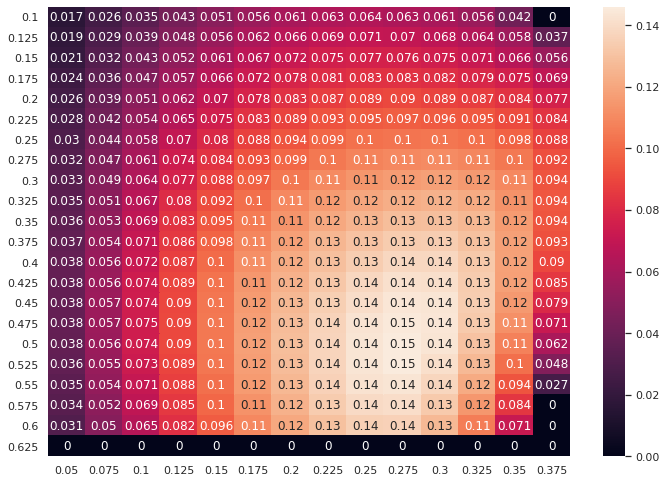

In [36]:
#plt.xticks(np.arange(0.05, 0.38,0.025 ), x)
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.heatmap(data = values, xticklabels= np.round(np.arange(0.05, 0.38,0.025 ),3 ),
           yticklabels= np.round(np.arange(0.1, 0.65,0.025 ),3 ), annot= True)
#sb.heatmap(data = values)


In [ ]:
perturb_range = 0.04
target_wvl = 1.54        # vaccum wavelength ( in um ) of the unperturbed cavity design

f_perturb_lower = 1 / (target_wvl + perturb_range )           # target_f - perturbation
f_perturb_upper = 1 / (target_wvl - perturb_range )           # target_f + perturbation

target_f = 1/target_wvl
target_f_Thz =  convert_freq_to_Thz(target_f) * 1.01

f_perturb_lower_Thz =  convert_freq_to_Thz(f_perturb_lower) * 1.01
f_perturb_upper_Thz =  convert_freq_to_Thz(f_perturb_upper) * 1.01

In [ ]:
import math
import numpy as np 
import matplotlib.pyplot as plt
import h5py
from meep import mpb
from math import sqrt, pi

from sweep_util import *

'''
---------------- FORMAT -------------------------------------------------------
The h5py file created from this script contains two datasets : 
(1) dset_gamma --> stores the mirror strength for parameters [w, a, hy, hx]
(2) dset_freq  --> stores the bandedge frequencies for parameters [w, a, hy, hx]
-------------------------------------------------------------------------------
'''

data_file = "sub_perturb_yO_190.hdf5"             # Name of the file where the data will be stored
param_file = "sub_perturb_yO_190_param.txt"      # Name of the file where the parameters of interest will be stored     
SUBSTRATE = True
wvg_height = 0.19
mode = "yO"

#-----------------DEFAULTS-----------------------#
#     del_a = 0.001      
#     del_hy = 0.025
#     del_hx = 0.025 
#     del_w = 0.05
#------------------------------------------------#

#--------------- Increments --------------------#
del_a = 0.001
del_hy = 0.025
del_hx = 0.025
del_w = 0.05

#------------------ Ranges ---------------------#
a_min = 0.25
a_max = 0.45        # upper limit of the sweep of a 

w_min = 0.65         #  lower limit of w 
w_max = 0.70        #  upper limit of w 

hx_min = 0.15        # lower limit of the sweep of a
hy_min = 0.225        #  lower limit of hy 

hx_max = a_max - 0.07
hy_max = w_max - 0.1  
#------------------ Geometry Characteristics ---------------------#
perturb_range = 0.04
target_wvl = 1.54        # vaccum wavelength ( in um ) of the unperturbed cavity design

f_perturb_lower = 1 / (target_wvl + perturb_range )           # target_f - perturbation
f_perturb_upper = 1 / (target_wvl - perturb_range )           # target_f + perturbation

f_target = 1/target_wvl
f_target_Thz =  convert_freq_to_Thz(f_target) * 1.01

f_perturb_lower_Thz =  convert_freq_to_Thz(f_perturb_lower) * 1.01
f_perturb_upper_Thz =  convert_freq_to_Thz(f_perturb_upper) * 1.01

parameters = []

e = 0.0001

run_count = 0

with h5py.File(data_file, 'w') as f:

    #dt = h5py.special_dtype(vlen=np.float32)
    gamma_max = 0        # arbitrary small value
    mirror_strength = []   
    
    j = len(np.arange(w_min, w_max + e , del_w))
    k = len(np.arange(a_min , a_max + e, del_a))
    l = len(np.arange(hy_min, hy_max + e , del_hy))
    m = len(np.arange(hx_min, hx_max + e, del_hx )) 
    
    #breakpoint()
    
    dset_gamma = f.create_dataset("gamma", (j,k,l,m))
    dset_gamma.attrs['wvg_height'] = wvg_height
    dset_gamma.attrs['substrate'] = SUBSTRATE
    dset_gamma.attrs["mode"] = "yO"
    
    dset_gamma[:,:,:,:] =  np.zeros((j,k,l,m))

    #dset_freq = f.create_dataset("freq", (j,k,l,m), dtype=dt)
    
    dset_freq_lower =  f.create_dataset("freq_lower", (j,k,l,m))
    dset_freq_upper =  f.create_dataset("freq_upper", (j,k,l,m))
    dset_freq_lower[:,:,:,:] = np.zeros((j,k,l,m))
    dset_freq_upper[:,:,:,:] = np.zeros((j,k,l,m))


    index = []
    index_count = 0
      # stores parameters for optimal value of gamma


    #---------------------------#
    #       WIDTH LOOP          
    #---------------------------#
    for w in np.arange(w_min, w_max  + e , del_w):

        #w = round(w,3)

        freq1_Thz = convert_freq_to_Thz(get_freqs(hx_min, hy_min, a_max, w, wvg_height,  # getting lowest possible frequencies for width w 
                                                  substrate = SUBSTRATE, mode = mode), 
                                        a_max)
        run_count += 1
        breakpoint()
#         dset_freq[int((w - w_min) / del_w + 0.1), 
#                   int((a_max - a_min) / del_a + 0.1), 
#                   int((hy_min - hy_min) / del_hy + 0.1), 
#                   int((hx_min - hx_min) / del_hx + 0.1)] = np.array((freq1_Thz[0], freq1_Thz[1]))
        
        dset_freq_lower[int((w - w_min) / del_w + 0.1), 
                        int((a_max - a_min) / del_a + 0.1), 
                        int((hy_min - hy_min) / del_hy + 0.1), 
                        int((hx_min - hx_min) / del_hx + 0.1)] = freq1_Thz[0]
        
        
        dset_freq_upper[int((w - w_min) / del_w + 0.1), 
                        int((a_max - a_min) / del_a + 0.1), 
                        int((hy_min - hy_min) / del_hy + 0.1), 
                        int((hx_min - hx_min) / del_hx + 0.1)] = freq1_Thz[1]

        print(" -------------------- w: {} loop ----------------------".format(w))
        #if ((freq1_Thz[0]  > f_target_Thz)):
        if ( freq1_Thz[0] > f_perturb_upper_Thz):

            continue
        else:

        #---------------------------#
        #   LATTICE CONSTANT LOOP          
        #---------------------------#

            for a in np.arange(a_min , a_max + e, del_a):
                print("------------------------a: {} loop-------------------------".format(a))
                #a = round(a,3)

                freq2_Thz = convert_freq_to_Thz(get_freqs(hx_min, hy_min, a, w, wvg_height,
                                                          substrate = SUBSTRATE,mode = mode), 
                                                a)  # getting lowest possible frequences for (w,a)
                run_count += 1
#                 dset_freq[int((w - w_min) / del_w + 0.1), 
#                           int((a - a_min) / del_a + 0.1), 
#                           int((hy_min - hy_min) / del_hy + 0.1), 
#                           int((hx_min - hx_min) / del_hx + 0.1)] = np.array((freq2_Thz[0], freq2_Thz[1]))

                dset_freq_lower[int((w - w_min) / del_w + 0.1), 
                               int((a - a_min) / del_a + 0.1), 
                               int((hy_min - hy_min) / del_hy + 0.1), 
                               int((hx_min - hx_min) / del_hx + 0.1)] = freq2_Thz[0]
        
                dset_freq_upper[int((w - w_min) / del_w + 0.1), 
                               int((a - a_min) / del_a + 0.1), 
                               int((hy_min - hy_min) / del_hy + 0.1), 
                               int((hx_min - hx_min) / del_hx + 0.1)] = freq2_Thz[1]

                
                #if ( freq2_Thz[0] > f_target_Thz):
                if (freq2_Thz[0] > f_perturb_lower_Thz):
                    continue

                #---------------------------#
                #       HY LOOP          
                #---------------------------#

                for hy in np.arange(hy_min, w - 0.1 + e , del_hy):
                    print("-----------------------hy {} loop----------------------".format(hy))
                    #hy = round(hy,3)

                    freq3_Thz = convert_freq_to_Thz(get_freqs(hx_min, hy, a, w, wvg_height, 
                                                              substrate = SUBSTRATE, mode = mode)
                                                    , a)  # getting lowest possible frequences for (w,a, hy)
                    run_count += 1
#                     dset_freq[int((w - w_min) / del_w + 0.1), 
#                               int((a - a_min) / del_a + 0.1), 
#                               int((hy - hy_min) / del_hy + 0.1), 
#                               int((hx_min - hx_min) / del_hx + 0.1)] = np.array((freq3_Thz[0], freq3_Thz[1]))
                    
                    dset_freq_lower[int((w - w_min) / del_w + 0.1), 
                                   int((a - a_min) / del_a + 0.1), 
                                   int((hy - hy_min) / del_hy + 0.1), 
                                   int((hx_min - hx_min) / del_hx + 0.1)] = freq3_Thz[0]
        
                    dset_freq_upper[int((w - w_min) / del_w + 0.1), 
                                   int((a - a_min) / del_a + 0.1), 
                                   int((hy - hy_min) / del_hy + 0.1), 
                                   int((hx_min - hx_min) / del_hx + 0.1)] = freq3_Thz[1]
            
                    #if ( (freq3_Thz[0]  > f_target_Thz) ):
                    if ( freq3_Thz[0] > f_perturb_upper_Thz):
                        continue

                    #---------------------------#
                    #       HX LOOP          
                    #---------------------------#

                    for hx in np.arange(hx_min, a - 0.07 + e, del_hx ):
                        count  = 0
                        print(" ---------------- hx : {} loop ---------------------".format(hx))
                        a = round(a,4)
                        hy = round(hy,4)
                        hx = round(hx,4)
                        w = round(w,4)

                        freq4_Thz = convert_freq_to_Thz(get_freqs(hx, hy, a, w, wvg_height, 
                                                                  substrate = SUBSTRATE, mode = mode)
                                                        , a )
                        run_count += 1
#                         dset_freq[int((w - w_min) / del_w + 0.1), 
#                                   int((a - a_min) / del_a + 0.1), 
#                                   int((hy - hy_min) / del_hy + 0.1), 
#                                   int((hx - hx_min) / del_hx + 0.1)] = np.array((freq4_Thz[0], freq4_Thz[1]))

                        dset_freq_lower[int((w - w_min) / del_w + 0.1), 
                                       int((a - a_min) / del_a + 0.1), 
                                       int((hy - hy_min) / del_hy + 0.1), 
                                       int((hx - hx_min) / del_hx + 0.1)] = freq4_Thz[0]
        
                        dset_freq_upper[int((w - w_min) / del_w + 0.1), 
                                       int((a - a_min) / del_a + 0.1), 
                                       int((hy - hy_min) / del_hy + 0.1), 
                                       int((hx - hx_min) / del_hx + 0.1)] = freq4_Thz[1]
            
                        #if ( freq4_Thz[0] > f_target_Thz):                   
                        if ( freq2_Thz[0] > f_perturb_upper_Thz):
                            
                            count = count + 1  # if w_target is outside the bandgap for 2 consecutive runs, break outside the loop
                            if count == 3 :    
                                break

                        #else:

    #                             if (f_target_Thz < freq4_Thz[1])  and (f_target_Thz > freq4_Thz[0]):  # final check to see that the target frequency is in the bandgap
                    if (f_perturb_lower_Thz < freq4_Thz[1])  and (f_perturb_upper_Thz > freq4_Thz[0]):
                        
                        
                        if (f_target_Thz < freq4_Thz[1])  and (f_target_Thz > freq4_Thz[0]):
                            
                                print(" ------------------- new gamma ------------------- at hx = {}, hy = {}, a = {}, w = {}".format(hx,hy,a,w))
                                
                                f_mid = (freq4_Thz[0] + freq4_Thz[1])/2            
                                diff = freq4_Thz[0] - freq4_Thz[1]
                                delta = 1 - (f_target_Thz/ f_mid)

                                gamma =  math.sqrt(abs(( 0.5 * diff/ f_mid ) ** 2 - delta**2 ))

                                mirror_strength.append(gamma)
                                index_count = index_count + 1
                                index.append(index_count)

                                dset_gamma[int((w - w_min) / del_w + 0.1), 
                                             int((a - a_min) / del_a + 0.1), 
                                             int((hy - hy_min) / del_hy + 0.1), 
                                             int((hx - hx_min) / del_hx + 0.1) ] = round(gamma,4)

#                         dset_freq[int((w - w_min) / del_w + 0.1), 
#                              int((a - a_min) / del_a + 0.1), 
#                              int((hy - hy_min) / del_hy + 0.1), 
#                              int((hx - hx_min) / del_hx + 0.1)] = np.array((freq4_Thz[0], freq4_Thz[1])) 

                                if gamma > gamma_max:
                                    print(" ------------------- new gamma max ------------------- at hx = {}, hy = {}, a = {}, w = {}, gamma = {}".format(hx,hy,a,w, gamma))
                                    gamma_max = gamma
        #                             parameters.append((round(hx, 4), 
        #                                                round(hy, 4), 
        #                                                round(a,  4), 
        #                                                round(w,  4), 
        #                                                freq4_Thz , 
        #                                                round(gamma_max,5))) 
                                    parameters.append((round(hx, 4), 
                                                        round(hy, 4), 
                                                        round(a,  4), 
                                                        round(w,  4), 
                                                        round(gamma_max,5),
                                                        round(freq4_Thz[0]),
                                                        round(freq4_Thz[1]))
                                                      )



#                             else:
#                                 continue

    with open(param_file, "w") as file1: 
        file1.write("wvg_height = {} , mode = {}, SUBSRATE = {}".format(wvg_height, mode, SUBSTRATE))
        file1.write("\n")
        for parameter in parameters:
    # Writing data to a file 
            file1.write("hx = {}, hy = {}, a = {}, w = {}, gamma = {}, freqs = {} , {} ".format(*parameter, )) 
            file1.write("\n")
        file1.write(f'run_count : {run_count}')

In [ ]:
a = get_value_from_index(169, 'a')
hx = get_value_from_index(12, 'hx')
hy = get_value_from_index(10, 'hy')
w = get_value_from_index(1, 'w')

In [ ]:
(get_freq_Thz( a = 0.45,hx = 0.2 ,hy = 0.2 ,w = 0.65, mode = 'yO', h = 0.19, substrate = True))

In [ ]:
convert_freq_to_Thz(1/1.54) * 1.01

In [ ]:
with h5py.File("testt2.hdf5", 'r') as f:
    gamma = f.get("gamma")
    gamma_np = np.array(gamma)
    
    freq_lower = f.get("freq_lower")
    freq_lower_np = np.array(freq_lower)
    
    freq_upper = f.get("freq_upper")
    freq_upper_np = np.array(freq_upper)
    

In [14]:
param_range = np.arange(0.2, 0.5, 0.05)

hx = 0.2
w = 0.65
hy = 0.2
a = 0.45
h = 0.19
substrate = False

freq_yodd = []
freq_yeven = []
distance = []

for hy in param_range:
    
    odd = get_freq_Thz( a = a,hx = hx ,hy = hy ,w = w, mode = 'yO', h = h, substrate = substrate)[0]
    even = get_freq_Thz( a = a,hx = hx ,hy = hy ,w = w, mode = 'yE', h = h, substrate = substrate)[0]
    freq_yodd.append(odd)
    freq_yeven.append(even)
    distance.append(even - odd)


 h = 0.19, SUBSTRATE = False, mode = yO
Initializing eigensolver data
Computing 2 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 20 x 80 x 80.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.25, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1.44444,0.422222)
          axes (1,0,0), (0,1,0), (0,0,1)
     ellipsoid, center = (0,0,0)
          size (0.444444,0.444444,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 6 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: yodd.
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.10598611831665039
solve_kpoint (0.5,0,0):
yoddfreqs:, k index, k1, k2, k3

          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 6 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: yodd.
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.15405631065368652
solve_kpoint (0.5,0,0):
yoddfreqs:, k index, k1, k2, k3, kmag/2pi, yodd band 1, yodd band 2
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 15 iterations.
yoddfreqs:, 1, 0.5, 0, 0, 0.5, 0.251101, 0.312062
elapsed time for k point: 2.1108124256134033
total elapsed time for run: 2.266155481338501
done
 h = 0.19, SUBSTRATE = False, mode = yE
Initializing eigensolver data
Computing 2 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 20 x 80 x 80.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/

[]

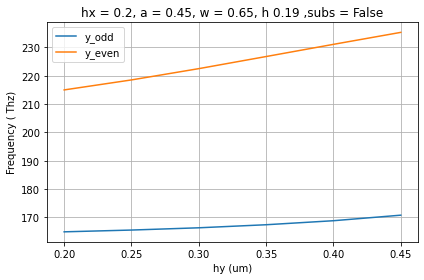

In [21]:
plt.plot(param_range, freq_yodd, label = "y_odd")
plt.plot(param_range, freq_yeven, label = "y_even")
#plt.plot(param_range, distance, label = "distance")
plt.xlabel("hy (um)")
plt.ylabel("Frequency ( Thz)")
plt.title(f'hx = {hx}, a = {a}, w = {w}, h {h} ,subs = {substrate}')
plt.legend()
plt.grid()
plt.tight_layout()
plt.plot()

In [11]:
distance = np.array(freq_yeven) - np.array(freq_yodd)

array([47.88632731, 50.38019399, 53.02445322, 55.49986063, 57.48788842,
       58.77973186])

In [ ]:
get_freq_Thz( a = a,hx = hx ,hy = 0.45 ,w = w, mode = 'zEyO', h = h, substrate = substrate)[0]

In [ ]:
hx = 0.275, hy = 0.5, a = 0.449, w = 0.7, freqs = [171.95136902 231.78296075], gamma = 0.14601